##基礎演習S 後半第1回

NE21-1228F
鈴木　拓己


###Ex.2-3　「基礎演習」シラバスの比較 （Word Cloudと棒グラフ）
#### 「基礎演習S」とそれ以外の基礎演習（インタラクションデザイン（基礎演習Dと同じ）とソフトウェア開発）のシラバスを比較したい．※情報英語基礎演習は除く．
---
####【問題】 
1. Ex.2-2の[2][3]で扱った形態素素解析の処理の部分を関数化しなさい．
  - 関数名は"getMorph"．
  - 引数は（科目シラバスファイルの）ファイルパスと品詞（docDFのpos）．
  - 戻り値は（不適切なものを除いた）形態素のデータフレーム．
1.getMorphとwordcloud関数を使って，3つの基礎演習の名詞・形容詞・動詞についてWord Cloudを描き，比較して気付きを簡単にコメントしなさい．
1.3つの基礎演習について，出現頻度のtop10の名詞（のみ）を棒グラフで示して比較しなさい．ヒント：頻度の多い順に並べ替えて10行分取る．orderとdecreasingパラメータ, barplotとnames.arg, lasパラメータなどを調べてみると良いだろう．

In [2]:
library(RMeCab)
# [1]
getMorph <- function(fn, pos) {
  dat <- docDF(fn, type =1, pos)
  names(dat)[4] <- "FREQ" # 列名の4番目を"FREQ"に変更
  ne <- grep("[[:punct:]]", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
  if(length(ne) != 0) dat <- dat[-ne,] # neの行削除　※neが空（要素数0）だとエラーになるので注意
  # (4) アルファベット1文字削除
  ne <- grep("^[Ａ-ＺA-Zａ-ｚa-z]$",dat$TERM,perl=TRUE)
  if(length(ne) != 0 && is.na(ne)) dat <- dat[-ne,]
  # (2,3,5) 数・接尾・非自立を削除
  ne <- which(dat$TERM %in% c("０","１","２","３","４","５","６","７","８","９","0","1","2","3","4","5","6","7","8","9","的","権","法","化","等","市","いる","こと","ため","の","を","する","と","だ","で","に","て","が","は","た","か"))
  if(length(ne) != 0) dat <- dat[-ne,]
  return(dat)
}

####うまく助詞が抜けなかったため、which(dat$TERM %in% c())に追加し、手動で消した。

In [3]:
# [2]
install.packages(c("wordcloud"), dependencies=TRUE)
library('wordcloud')
pos <- c("名詞", "形容詞", "動詞")
fn <- c("32140.txt","32558.txt","32142.txt")
wordcloud(getMorph(fn[1],pos)$TERM, dat$FREQ, min.freq = 3, scale = c(4, 11), colors = brewer.pal(30, "Paired")) #基礎演習S

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’, ‘Rcpp’, ‘tm’, ‘slam’


Loading required package: RColorBrewer

Warning message in brewer.pal(30, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


ERROR: ignored

Warning message in brewer.pal(30, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


file_name =  ./32558.txt opened
number of extracted terms = 224
now making a data frame. wait a while!



Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“または could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“示す could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“できる could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“直接 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“呼び出し could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“記述 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[2], pos)$TERM, dat$FREQ, min.freq = 3, :
“取り組む could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMor

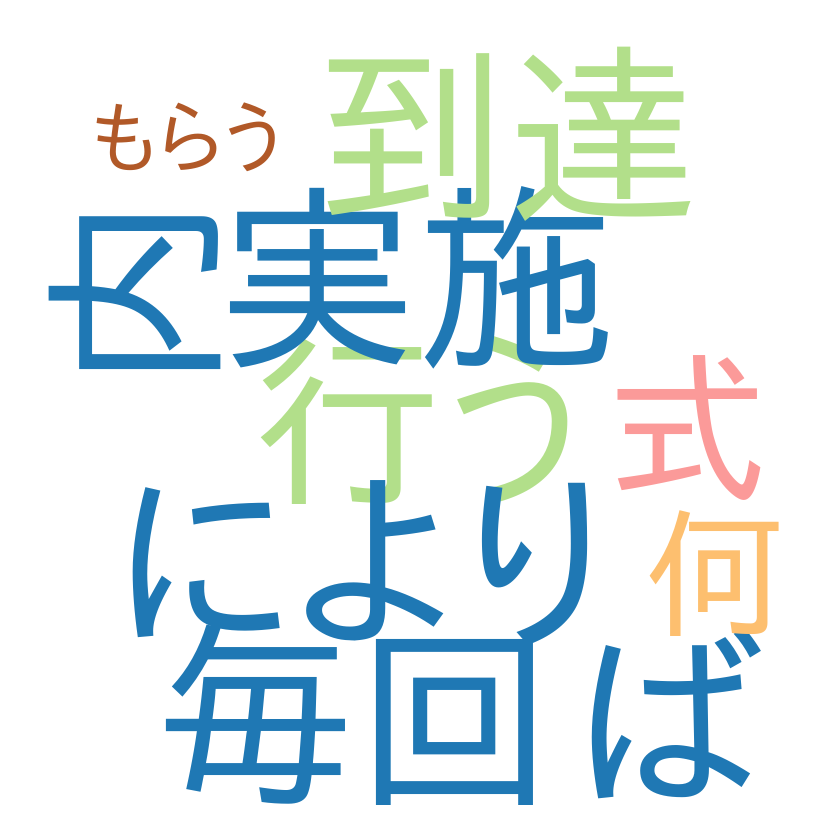

In [ ]:
wordcloud(getMorph(fn[2],pos)$TERM, dat$FREQ, min.freq = 3, scale = c(4, 11), colors = brewer.pal(30, "Paired")) #ソフトウェア開発基礎演習

Warning message in brewer.pal(30, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


file_name =  ./32142.txt opened
number of extracted terms = 303
now making a data frame. wait a while!



Warning message in length(ne) != 0 && is.na(ne):
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“制作 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“体系 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“応用 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“中 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“プロトタイピング could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq = 3, :
“評価 could not be fit on page. It will not be plotted.”
Warning message in wordcloud(getMorph(fn[3], pos)$TERM, dat$FREQ, min.freq

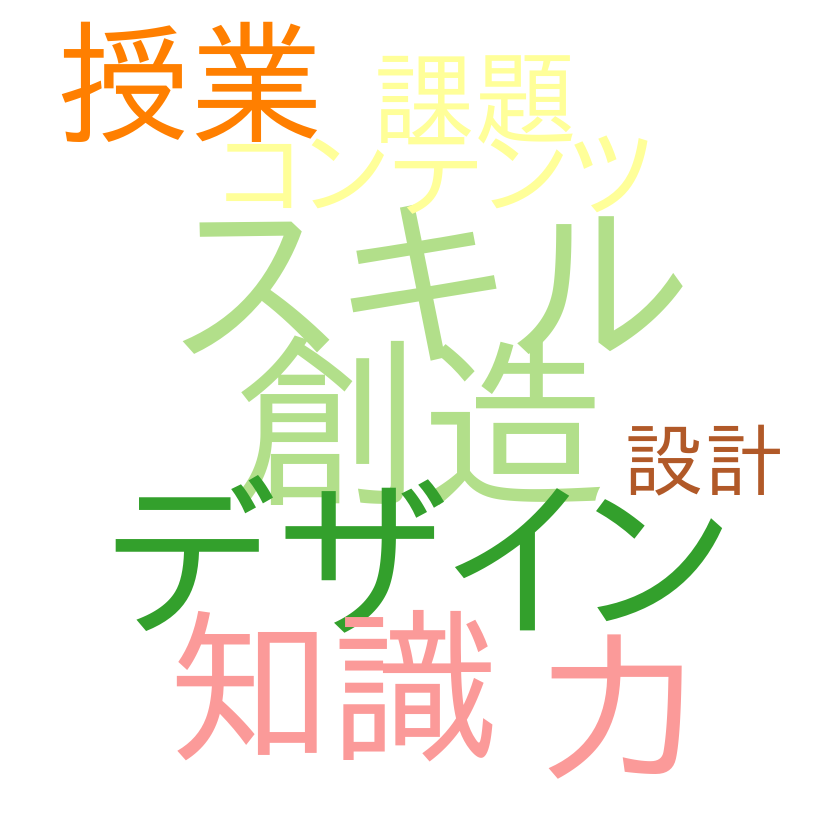

In [ ]:
wordcloud(getMorph(fn[3],pos)$TERM, dat$FREQ, min.freq = 3, scale = c(4, 11), colors = brewer.pal(30, "Paired")) #インタラクションデザイン基礎演習

##気づき
基礎演習Sはデータについてのワードが上がり、ビックデータなどをどのように傾向を掴むのか理解する講義だと推測できる。
ソフトウェア開発基礎演習は実際に何かを行いながら反転授業を通して身につけていく講義だと推測できる。
インタラクションデザイン基礎演習は社会、情報といったものを共有という形でチームで何か物事に取り組んでいく講義だと推測される。

In [ ]:
fn <- c("32140.txt","32142.txt","32558.txt")				# 3教科のファイル名ベクトル
pos <- c("名詞")
getMorph(fn[1],pos)

file_name =  ./32140.txt opened
number of extracted terms = 246
now making a data frame. wait a while!

file_name =  ./32142.txt opened
number of extracted terms = 303
now making a data frame. wait a while!



Warning message in length(ne) != 0 && is.na(ne):
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


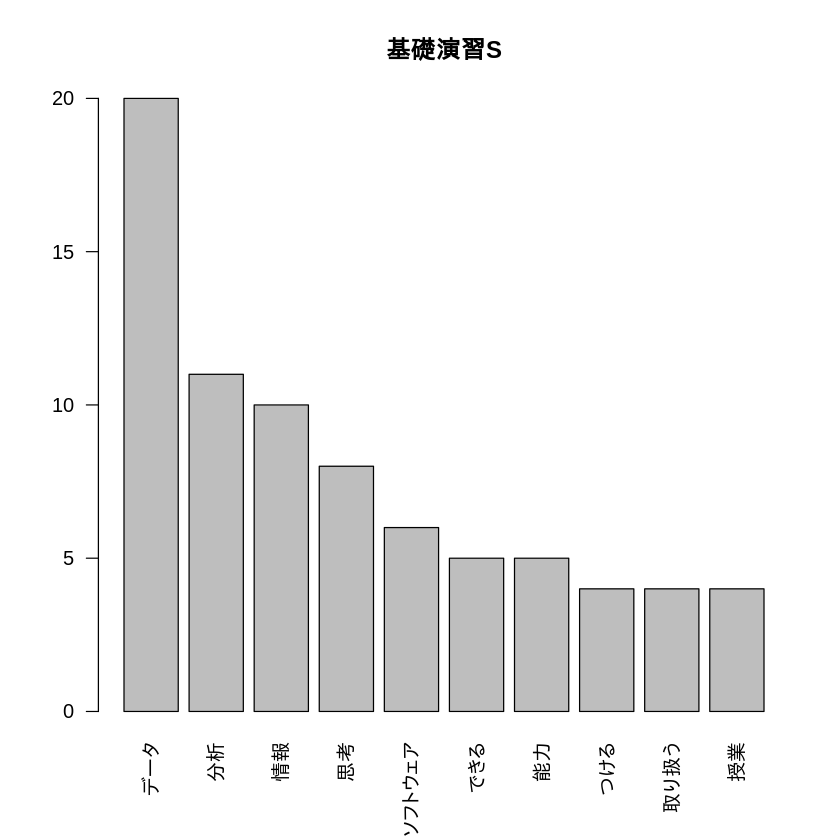

file_name =  ./32558.txt opened
number of extracted terms = 224
now making a data frame. wait a while!



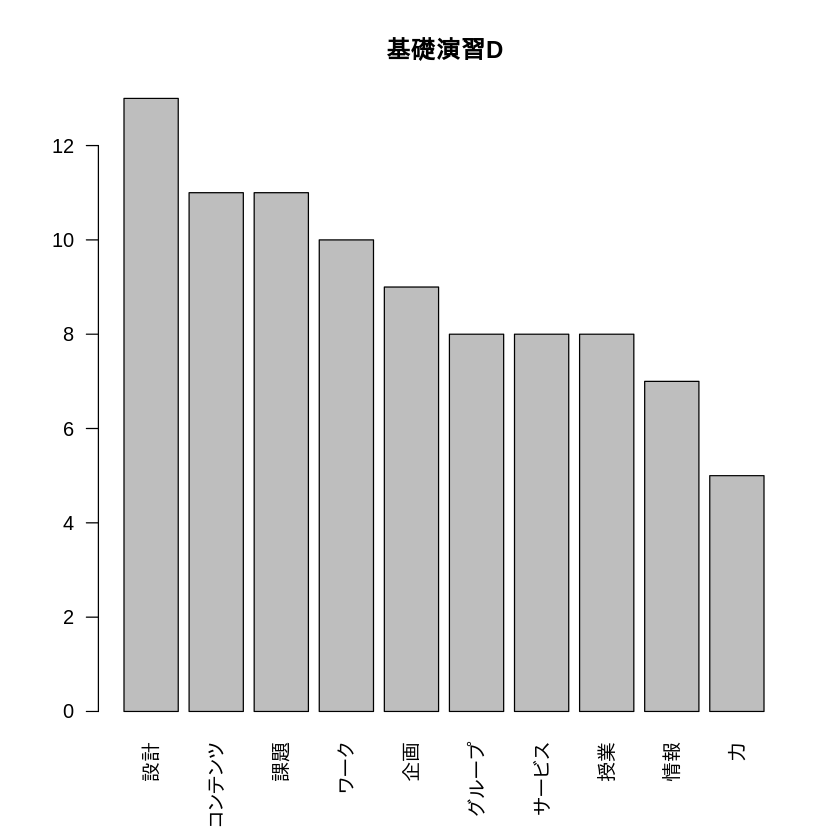

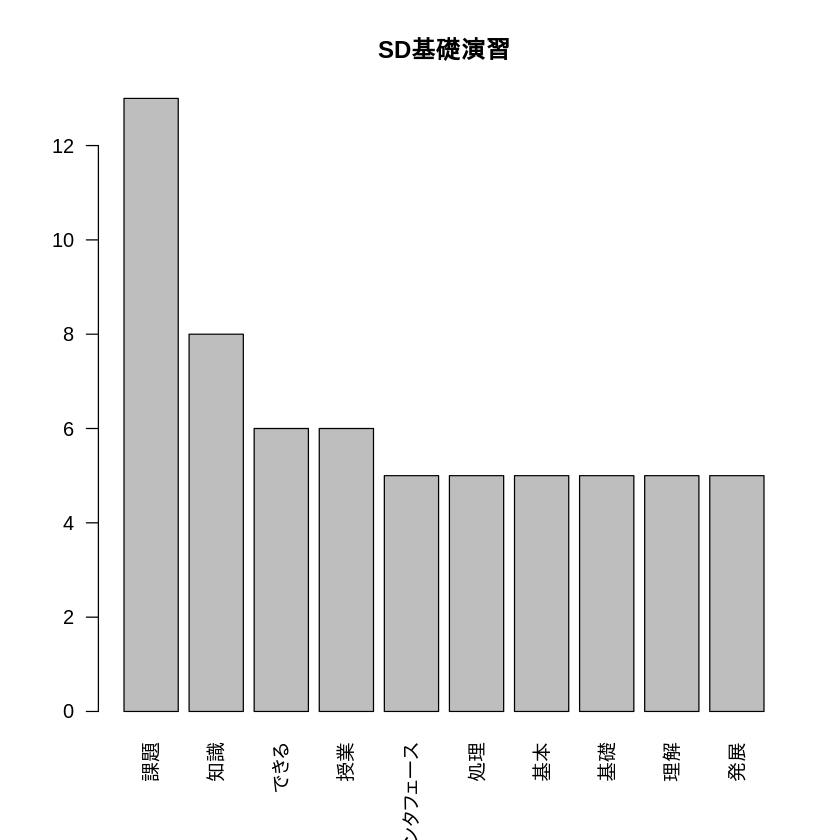

In [ ]:
# [3]
barMorph <- function(fn, pos, sn, n) {		# 引数にオブジェクト（変数）fn、オブジェクト（変数）pos、オブジェクト（変数）sn、オブジェクト（変数）nをもつ関数barMorphを定義。
  dat <- getMorph(fn, pos)			#getMorph関数を用いてfn(ファイルパス),pos(品詞)を引数として形態素のデータフレームをオブジェクト（変数）datに代入。
  id <- order(dat$FREQ, decreasing=TRUE)    # 引数の項目(dat$FREQ)でソートしたときに元データの項目番号がどのような順番で並ぶかをオブジェクト（変数）id代入。。
  h <- dat[id[1:n], 4]			# orderで得たデータの順番を利用し、上から並び替え、オブジェクト（変数）hに代入。今回はdatの4列目の値（1からn）を代入、つまり名詞の出現回数が入る。
  noun <- dat[id[1:n], 1]			# orderで得たデータの順番を利用し、上から並び替え、オブジェクト（変数）nounに代入。今回はdatの1列目（1からn）の値を代入、つまり名詞が入る。
  #par(mar=c(7,3,3,2))
  barplot(h, names.arg=noun, las=2, main=sn)	# hベクトルの棒グラフを作成する。
                                                #names.argはグループの名前をx軸に追加する。今回は出現した名詞(noun)。
                                                #las=2はラベルを縦に表記するときに利用。
                                                #mainはグラフの名前を指定。今回は引数snを代入。
}

# 基礎演習S，インタラクションデザイン（基礎演習D），ソフトウェア開発（SD基礎演習）のW.Cloud
fns <- c("32140.txt","32142.txt","32558.txt")				# 3教科のファイル名ベクトル
pos <- c("名詞")				# 品詞名のベクトル
sns <- c("基礎演習S", "基礎演習D", "SD基礎演習")	# 3教科の教科名ベクトル
n <- 10					# 数値10をオブジェクト（変数）nに代入。
for(i in 1:3) barMorph(fns[i], pos, sns[i], n)	# for文でiを1から3まで繰り返す。
                                              #処理内容は関数barMorphを実行し、引数は3教科のファイル名ベクトル、品詞名のベクトル、3教科の教科名ベクトル、数値)とする。
                                              #なお、fns[i]と sns[i]はインデックスを指定し、ベクトルの内容を一つずつ代入。

###気づき
うまく助詞が抜けなかったため、which(dat$TERM %in% c())に追加し、手動で消した。
ほとんどの教科において課題というワードが上がったため改めてネットワーク情報学部は課題に力が入れられていることがわかった。
基礎演習Sはデータについてのワードが多く上がり、データについて取り扱い、分析やソフトウェアで何かすると推測できた。 ソフトウェア開発基礎演習は課題についてのワードが多く上がり、他にも実際に講義を受けて感じる基本と発展の内容が実際にピックアップされ分析できていると感じた。インタラクションデザイン基礎演習は全体としてグループワークなどを通して企画しサービスを提供する力を身につけていることが推測できる。

In [1]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

